## Red Neuronal Simple de una Capa Oculta


<h2>Objetivo</h2><ul><li>Cómo crear una Red Neuronal simple en PyTorch.</li></ul>


In [1]:
import torch
import torch.nn as nn
from torch import sigmoid
import matplotlib.pylab as plt
import numpy as np
torch.manual_seed(0)

Usado para graficar el modelo


In [2]:
def PlotStuff(X, Y, model, epoch, leg=True):

    plt.plot(X.numpy(), model(X).detach().numpy(), label=('epoch ' + str(epoch)))
    plt.plot(X.numpy(), Y.numpy(), 'r')
    plt.xlabel('x')
    if leg == True:
        plt.legend()
    else:
        pass

### Módulo de Red Neuronal y Función de Entrenamiento


Define las activaciones y la salida de la primera capa lineal como un atributo. Nota que esto no es una buena práctica.


In [3]:
class Net(nn.Module):

    # Constructor
    def __init__(self, D_in, H, D_out):
        super(Net, self).__init__()
        # hidden layer
        self.linear1 = nn.Linear(D_in, H)
        self.linear2 = nn.Linear(H, D_out)
        # Define the first linear layer as an attribute, this is not good practice
        self.a1 = None
        self.l1 = None
        self.l2=None

    # Prediction
    def forward(self, x):
        self.l1 = self.linear1(x)
        self.a1 = sigmoid(self.l1)
        self.l2=self.linear2(self.a1)
        yhat = sigmoid(self.linear2(self.a1))
        return yhat

Define la función de entrenamiento:


In [4]:
def train(Y, X, model, optimizer, criterion, epochs=1000):
    cost = []
    total=0
    for epoch in range(epochs):
        total=0
        for y, x in zip(Y, X):
            yhat = model(x)
            loss = criterion(yhat, y)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            #cumulative loss
            total+=loss.item()
        cost.append(total)
        if epoch % 300 == 0:
            PlotStuff(X, Y, model, epoch, leg=True)
            plt.show()
            model(X)
            plt.scatter(model.a1.detach().numpy()[:, 0], model.a1.detach().numpy()[:, 1], c=Y.numpy().reshape(-1))
            plt.title('activations')
            plt.show()
    return cost

## Genera algunos datos


In [5]:
X = torch.arange(-20, 20, 1).view(-1, 1).type(torch.FloatTensor)
Y = torch.zeros(X.shape[0])
Y[(X[:, 0] > -4) & (X[:, 0] < 4)] = 1.0

Define la Red Neuronal, la Función de Criterio, el Optimizador y entrena el modelo


Crea la función de perdida de Entropía-Cruzada

In [6]:
def criterion_cross(outputs, labels):
    out = -1 * torch.mean(labels * torch.log(outputs) + (1 - labels) * torch.log(1 - outputs))
    return out

Define la Red Neuronal, el Optimizador y entrena el modelo:


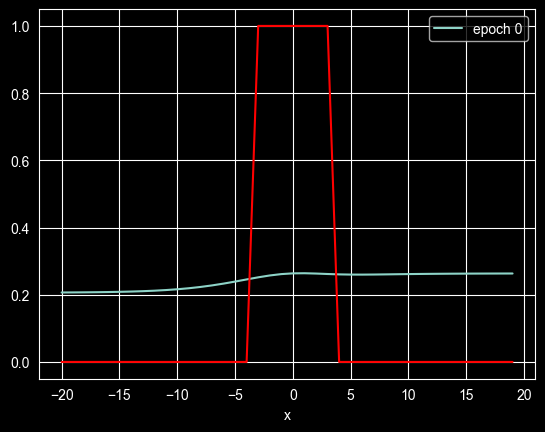

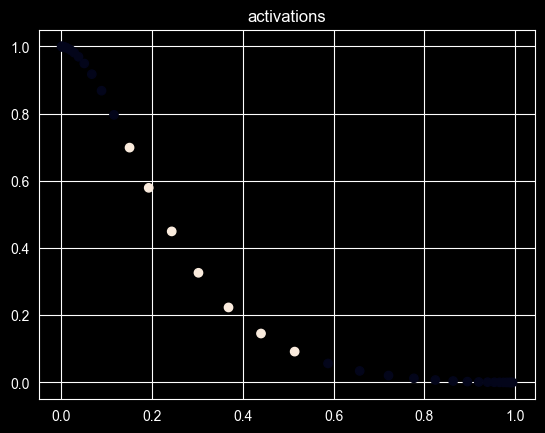

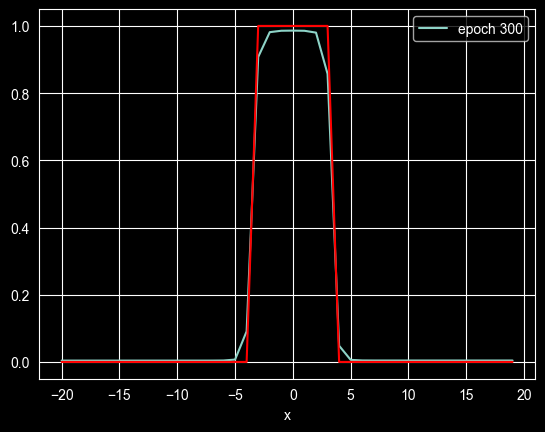

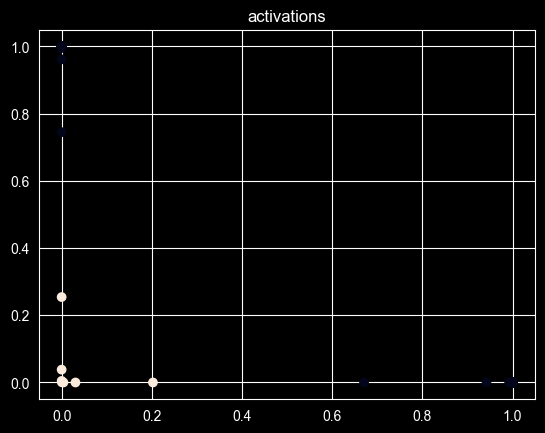

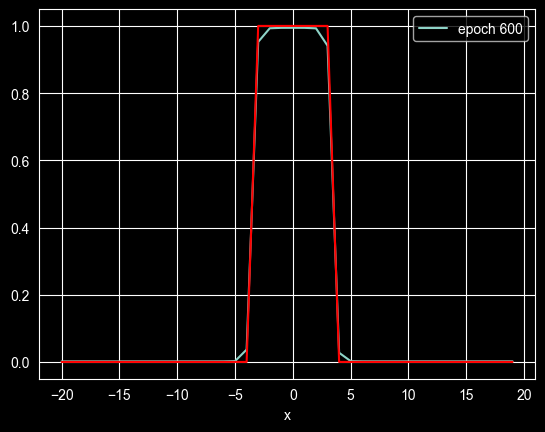

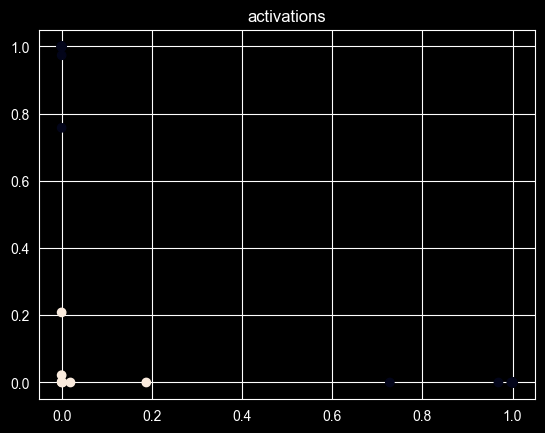

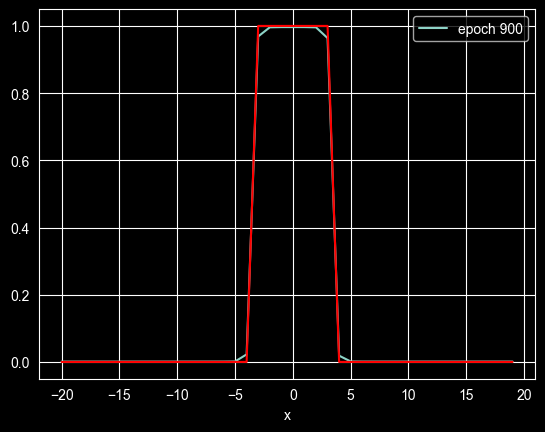

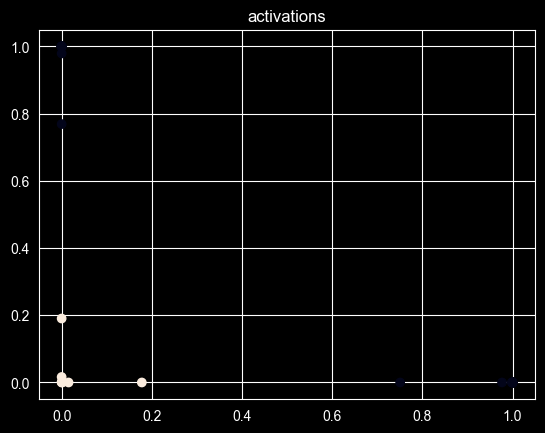

Text(0.5, 1.0, 'cross entropy loss')

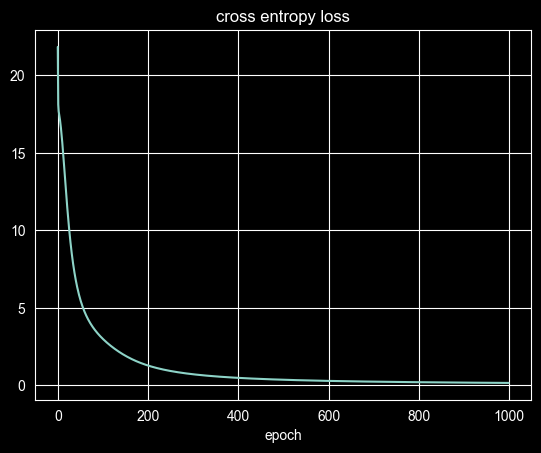

In [7]:
# Train the model
# size of input
D_in = 1
# size of hidden layer
H = 2
# number of outputs
D_out = 1
# learning rate
learning_rate = 0.1
# create the model
model = Net(D_in, H, D_out)
#optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
#train the model usein
cost_cross = train(Y, X, model, optimizer, criterion_cross, epochs=1000)
#plot the loss
plt.plot(cost_cross)
plt.xlabel('epoch')
plt.title('cross entropy loss')

Al examinar la salida de la activación, se observa que para la época 600 los datos han sido mapeados a un espacio linealmente separable.


Podemos hacer una predicción para un tensor arbitrario de unos


In [8]:
x=torch.tensor([0.0])
yhat=model(x)
yhat

tensor([0.9969], grad_fn=<SigmoidBackward0>)

Podemos hacer una predicción para algunos tensores arbitrarios de unos


In [9]:
X_=torch.tensor([[0.0],[2.0],[3.0]])
Yhat=model(X_)
Yhat

tensor([[0.9969],
        [0.9963],
        [0.9680]], grad_fn=<SigmoidBackward0>)

Podemos umbralizar la predicción

In [10]:
Yhat=Yhat>0.5
Yhat

tensor([[True],
        [True],
        [True]])

## Practica
Repite los pasos anteriores usando el costo MSE o la pérdida total:


C:\Users\Josue Santana Robled\PycharmProjects\Coursera\.venv\Lib\site-packages\torch\nn\modules\loss.py:616: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


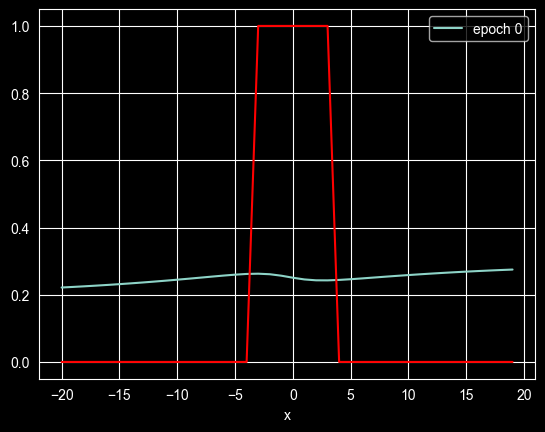

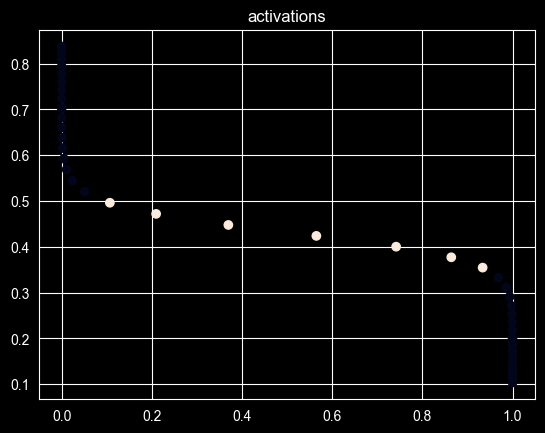

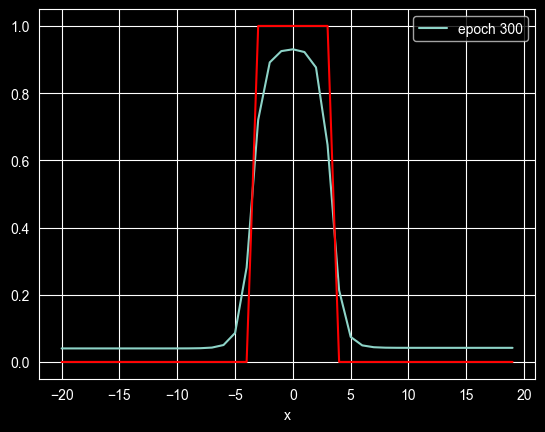

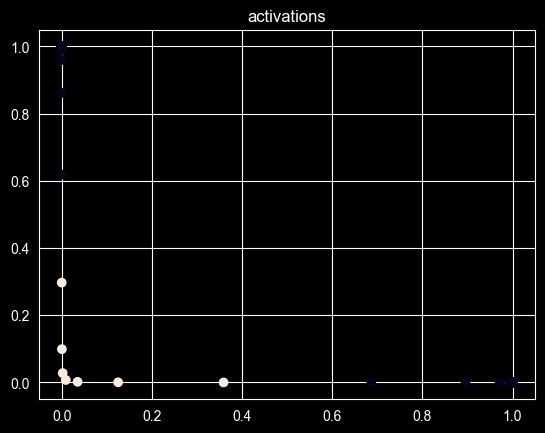

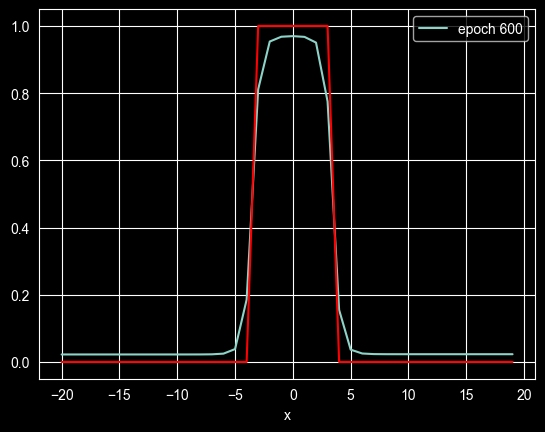

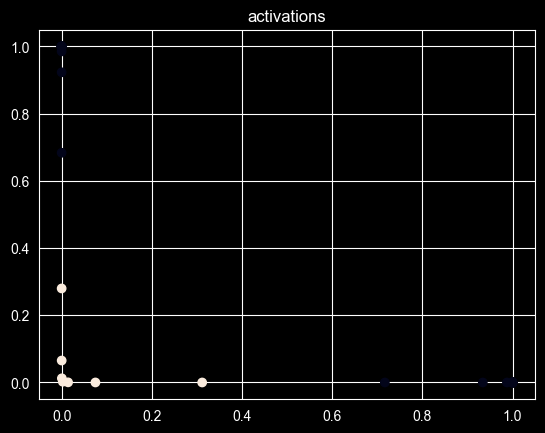

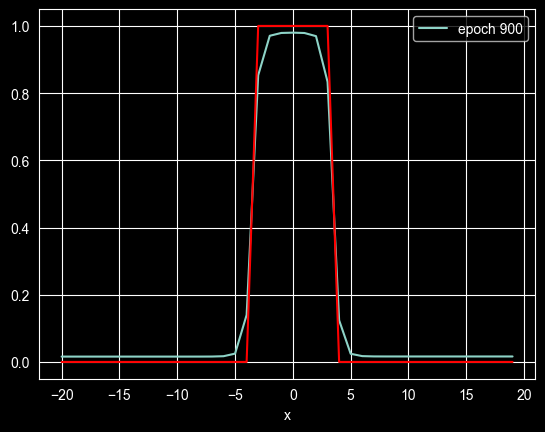

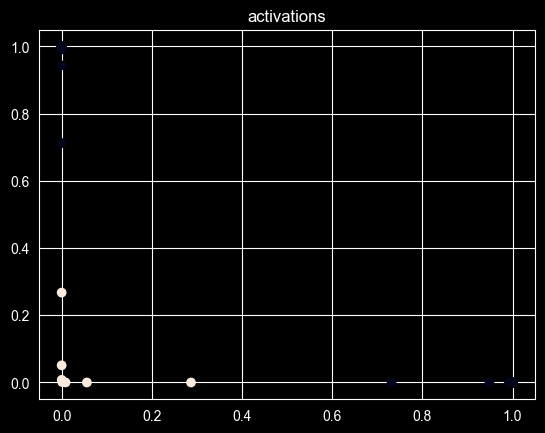

Text(0.5, 1.0, 'MSE loss ')

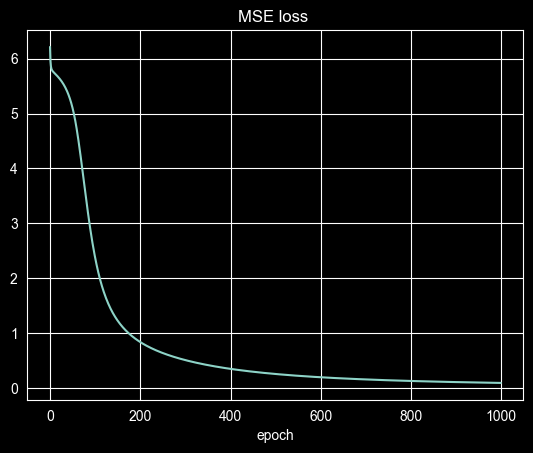

In [11]:
learning_rate = 0.1
criterion_mse=nn.MSELoss()
model=Net(D_in,H,D_out)
optimizer=torch.optim.SGD(model.parameters(), lr=learning_rate)
cost_mse=train(Y,X,model,optimizer,criterion_mse,epochs=1000)
plt.plot(cost_mse)
plt.xlabel('epoch')
plt.title('MSE loss ')